In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\Ajeet Kumar\Downloads\SocialMediaUsersDataset (1).csv")
df.head()

,UserID,Name,Gender,DOB,Interests,City,Country
0,1,Jesse Lawhorn,Female,1958-10-15,"'Movies', 'Fashion', 'Fashion', 'Books'",Sibolga,Indonesia
1,2,Stacy Payne,Female,2004-07-21,"'Gaming', 'Finance and investments', 'Outdoor ...",Al Abyār,Libya
2,3,Katrina Nicewander,Female,2000-02-07,"'DIY and crafts', 'Music', 'Science', 'Fashion'",Wādī as Sīr,Jordan
3,4,Eric Yarbrough,Male,1985-04-14,"'Outdoor activities', 'Cars and automobiles'",Matera,Italy
4,5,Daniel Adkins,Female,1955-09-18,"'Politics', 'History'",Biruaca,Venezuela


In [5]:
# Basic Data Inspection

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   UserID     100000 non-null  int64 
 1   Name       100000 non-null  object
 2   Gender     100000 non-null  object
 3   DOB        100000 non-null  object
 4   Interests  100000 non-null  object
 5   City       100000 non-null  object
 6   Country    100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [6]:
# Text Cleaning Function

import re
def clean_text(text):
    text = str(text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

In [7]:
# Handling Missing Data

import numpy as np
print(df.isnull().sum())
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)
categorical_cols = df.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
print(df.isnull().sum())

UserID       0
Name         0
Gender       0
DOB          0
Interests    0
City         0
Country      0
dtype: int64


C:\Users\Ajeet Kumar\AppData\Local\Temp\ipykernel_15204\516694682.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\Ajeet Kumar\AppData\Local\Temp\ipykernel_15204\516694682.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



UserID       0
Name         0
Gender       0
DOB          0
Interests    0
City         0
Country      0
dtype: int64


In [15]:
# Sentiment Analysis

from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
df.head()

,UserID,Name,Gender,DOB,Interests,City,Country,Age,AgeGroup
0,1,Jesse Lawhorn,female,1958-10-15,"'Movies', 'Fashion', 'Fashion', 'Books'",Sibolga,Indonesia,67,Senior
1,2,Stacy Payne,female,2004-07-21,"'Gaming', 'Finance and investments', 'Outdoor ...",Al Abyār,Libya,21,Young Adult
2,3,Katrina Nicewander,female,2000-02-07,"'DIY and crafts', 'Music', 'Science', 'Fashion'",Wādī as Sīr,Jordan,25,Young Adult
3,4,Eric Yarbrough,male,1985-04-14,"'Outdoor activities', 'Cars and automobiles'",Matera,Italy,40,Adult
4,5,Daniel Adkins,female,1955-09-18,"'Politics', 'History'",Biruaca,Venezuela,70,Senior


In [10]:
df_encoded = pd.get_dummies(df[['Gender', 'City', 'Country']], drop_first=True)

In [11]:
# Clean & Standardize ‘Gender’

df['Gender'] = df['Gender'].str.strip().str.lower()
df['Gender'].value_counts()

Gender
male      50069
female    49931
Name: count, dtype: int64

In [13]:
# Extract Age from DOB


from datetime import datetime
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df['Age'] = df['DOB'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)

In [14]:
# Create Age Groups

def age_group(age):
    if age < 18:
        return 'Teen'
    elif age < 30:
        return 'Young Adult'
    elif age < 50:
        return 'Adult'
    else:
        return 'Senior'
df['AgeGroup'] = df['Age'].apply(age_group)

In [16]:
# Clean Interests (Text Preprocessing)

import re
df['Cleaned_Interests'] = df['Interests'].str.lower().apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [17]:
# Word Count in Interests

df['Interest_Word_Count'] = df['Cleaned_Interests'].apply(lambda x: len(x.split()))

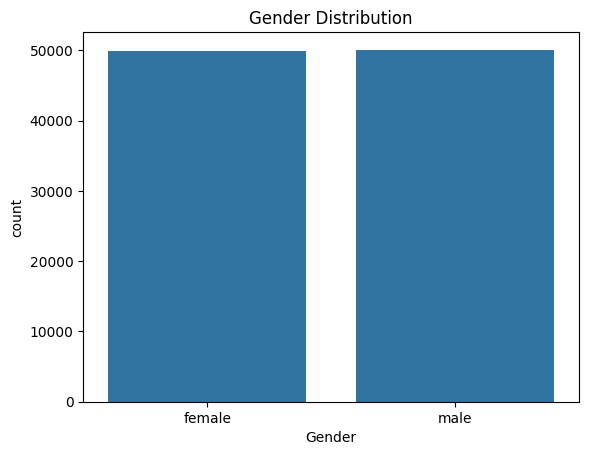

In [18]:
# Gender Distribution Plot

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

Text(0.5, 1.0, 'Age Distribution')

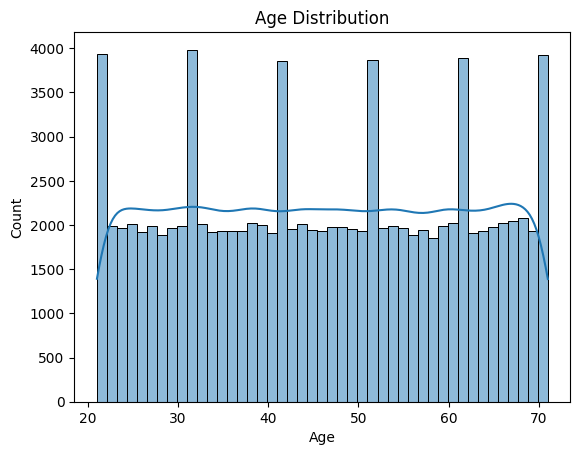

In [19]:
# Age Distribution Plot

sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

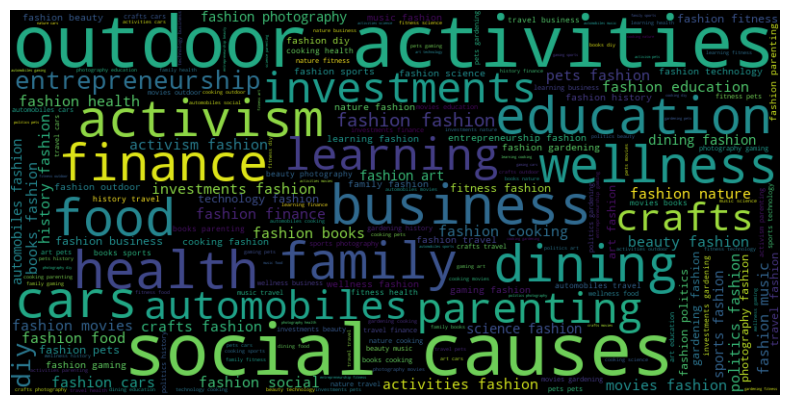

In [25]:
# Word Cloud of Interests

from wordcloud import WordCloud
text = ' '.join(df['Cleaned_Interests'].dropna())
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

<Axes: title={'center': 'Top Cities'}, xlabel='City'>

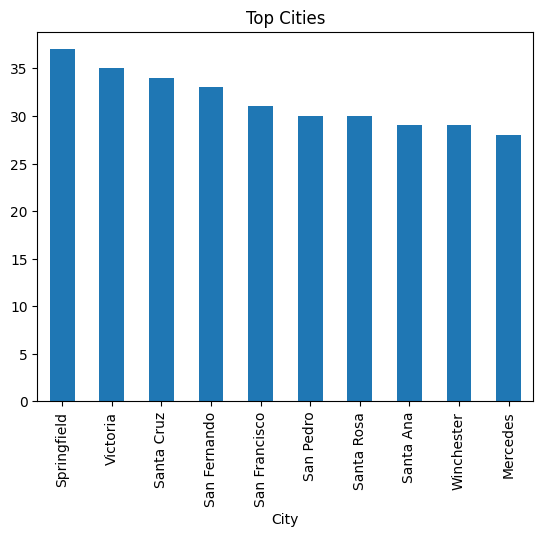

In [21]:
# Top Cities/Countries

df['City'].value_counts().head(10).plot(kind='bar', title="Top Cities")

In [22]:
# Encode Categorical Data

df_encoded = pd.get_dummies(df[['Gender', 'City', 'AgeGroup']], drop_first=True)

In [23]:
# Interest Keyword Flags

keywords = ['depression', 'anxiety', 'mental', 'stress', 'therapy']
for kw in keywords:
    df[f'has_{kw}'] = df['Cleaned_Interests'].apply(lambda x: 1 if kw in x else 0)

<Axes: >

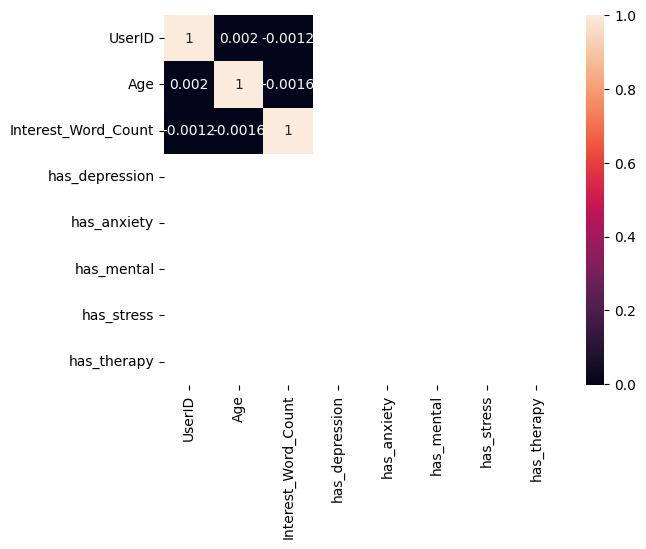

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

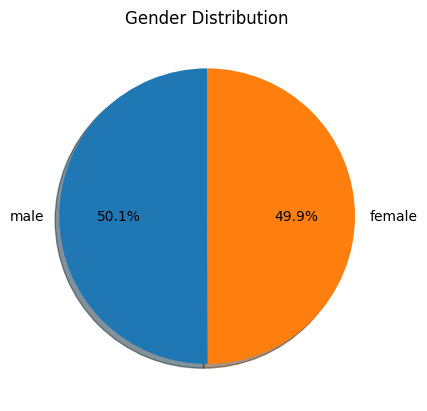

In [26]:
# Pie Chart of Gender Distribution

# Train-Test Split

df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Gender Distribution")
plt.ylabel('')
plt.show()

C:\Users\Ajeet Kumar\AppData\Local\Temp\ipykernel_15204\1088303070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AgeGroup', palette='Set2')


Text(0.5, 1.0, 'Distribution of Age Groups')

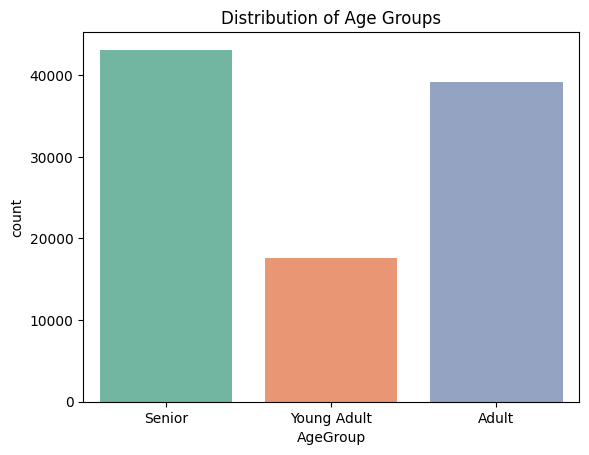

In [27]:
# Count Plot of Age Groups

sns.countplot(data=df, x='AgeGroup', palette='Set2')
plt.title("Distribution of Age Groups")

Text(0.5, 1.0, 'Age Distribution by Gender')

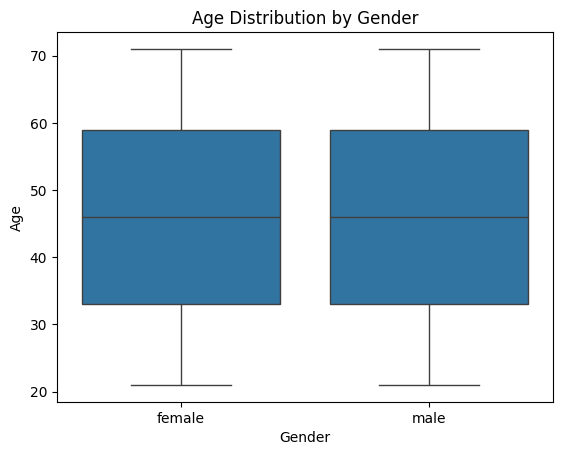

In [28]:
# Boxplot of Age by Gender

sns.boxplot(x='Gender', y='Age', data=df)
plt.title("Age Distribution by Gender")

Text(0.5, 0, 'Number of Users')

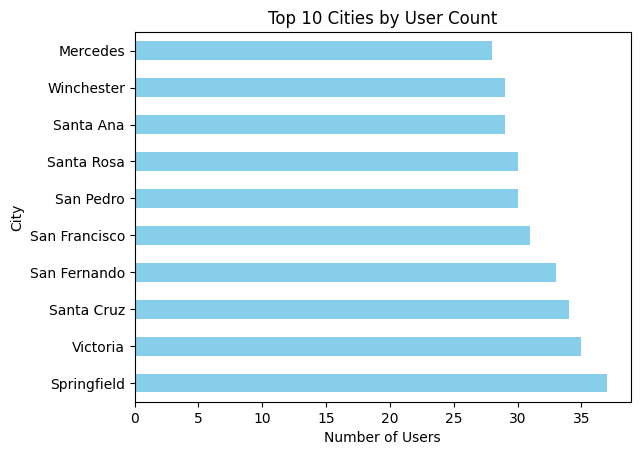

In [29]:
#  Most Common Cities (Top 10)

df['City'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Cities by User Count")
plt.xlabel("Number of Users")

Text(0, 0.5, 'Number of Users')

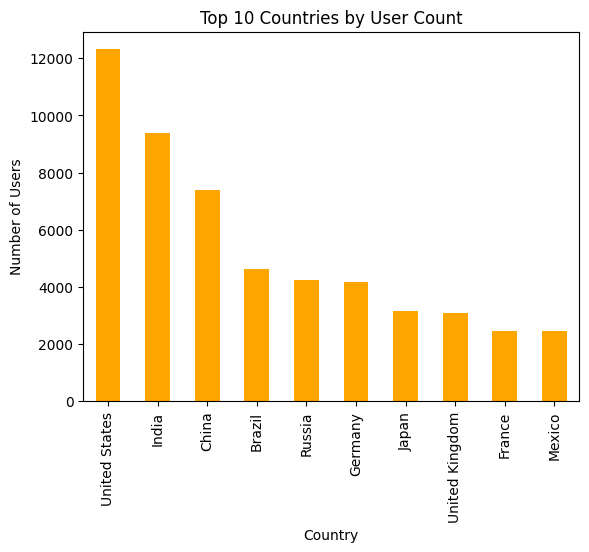

In [30]:
# Most Common Countries (Top 10)

df['Country'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Countries by User Count")
plt.ylabel("Number of Users")

C:\Users\Ajeet Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Ajeet Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


Text(0.5, 1.0, 'Keyword Correlation in Interests')

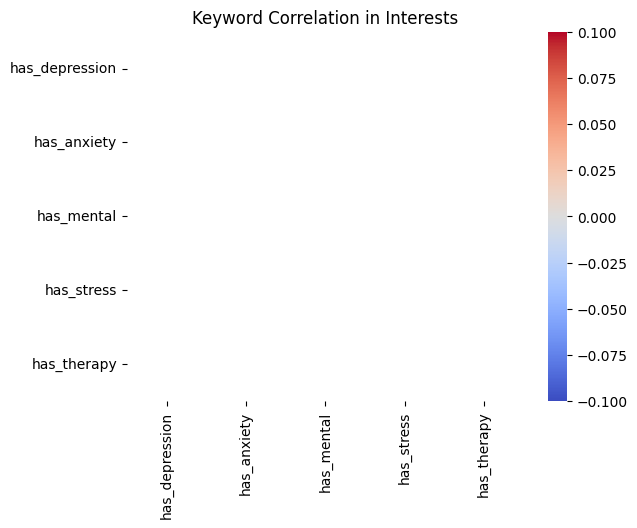

In [31]:
#  Heatmap of Interests Keyword Flags

import seaborn as sns

keyword_cols = [col for col in df.columns if col.startswith('has_')]
sns.heatmap(df[keyword_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Keyword Correlation in Interests")

Text(0, 0.5, 'Number of Users Mentioning')

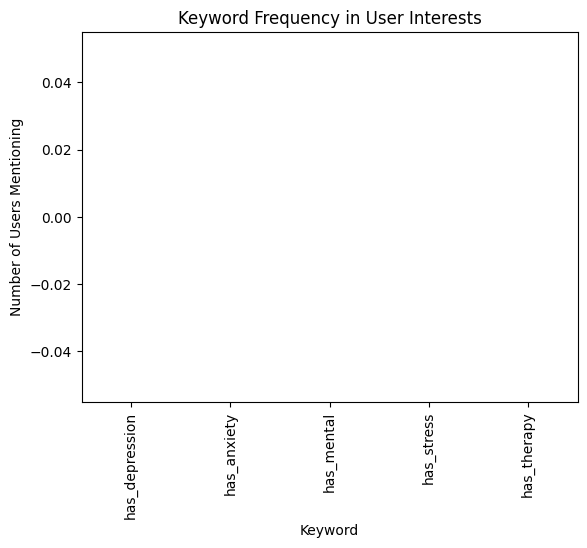

In [32]:
#  Barplot of Keyword Count in Interests

keyword_counts = df[[col for col in df.columns if col.startswith('has_')]].sum()
keyword_counts.plot(kind='bar', color='teal')
plt.title("Keyword Frequency in User Interests")
plt.xlabel("Keyword")
plt.ylabel("Number of Users Mentioning")

Text(0.5, 1.0, 'Distribution of Word Count in User Interests')

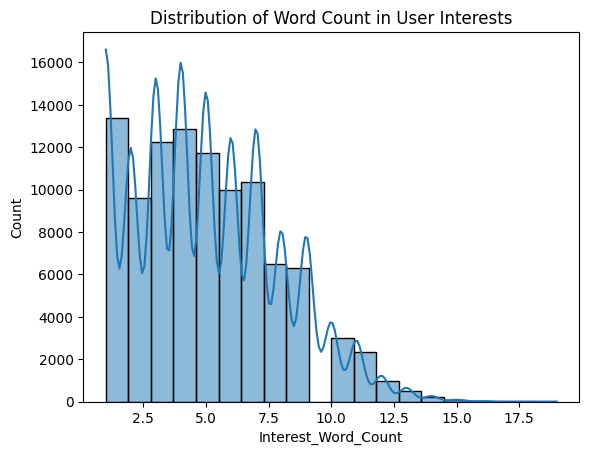

In [33]:
# Distribution of Word Count in Interests

sns.histplot(df['Interest_Word_Count'], kde=True, bins=20)
plt.title("Distribution of Word Count in User Interests")

In [ ]:
# Violin Plot: Sentiment by Age Group

sns.violinplot(x='AgeGroup', y='Interest_Sentiment', data=df)
plt.title("Sentiment Distribution by Age Group")

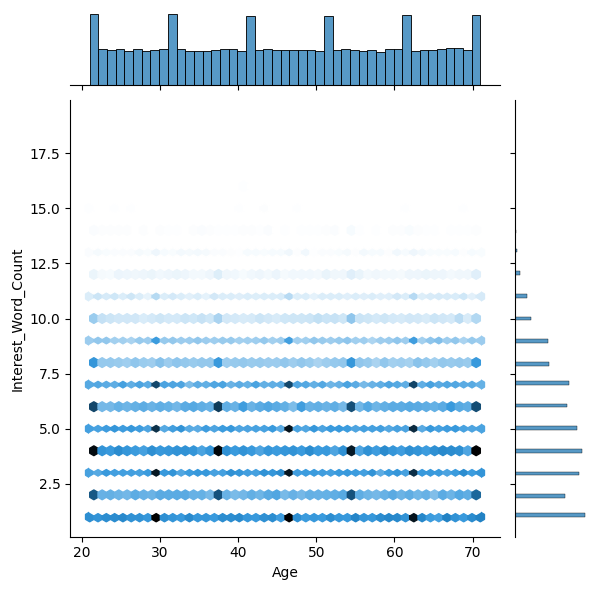

In [36]:
# Jointplot: Age vs Interest Word Count

sns.jointplot(data=df, x='Age', y='Interest_Word_Count', kind='hex')

In [ ]:
# City vs Avg Sentiment (Optional)

city_sentiment = df.groupby('City')['Interests'].mean().sort_values(ascending=False).head(10)
city_sentiment.plot(kind='barh', color='coral')
plt.title("Average Sentiment by City (Top 10)")

C:\Users\Ajeet Kumar\AppData\Local\Temp\ipykernel_15204\2462829312.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_keywords = df.groupby('AgeGroup')[[col for col in df.columns if col.startswith('has_')]].mean()


Text(0.5, 1.0, 'Avg Keyword Mentions by Age Group')

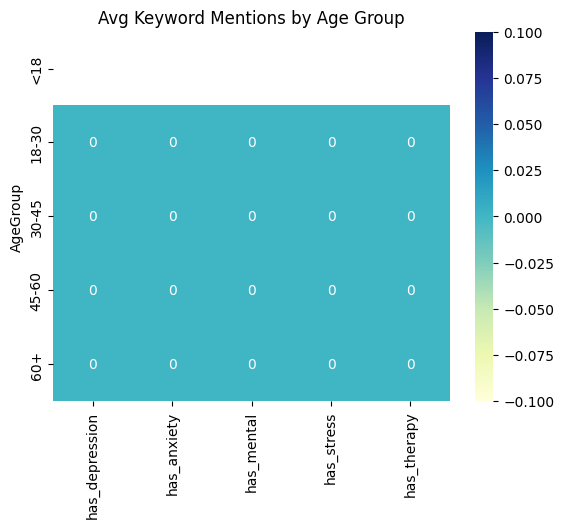

In [44]:
# Age vs Keyword Flag Heatmap

age_keywords = df.groupby('AgeGroup')[[col for col in df.columns if col.startswith('has_')]].mean()
sns.heatmap(age_keywords, annot=True, cmap="YlGnBu")
plt.title("Avg Keyword Mentions by Age Group")

Text(0.5, 1.0, 'Interest Length by Country')

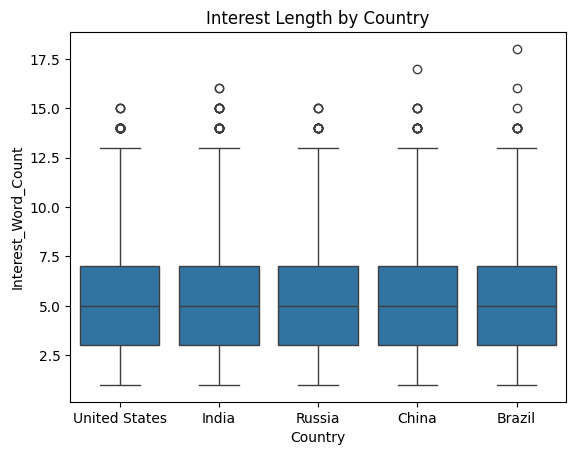

In [45]:
# Interest Word Count by Country (Top 5 Countries)

top_countries = df['Country'].value_counts().head(5).index
sns.boxplot(data=df[df['Country'].isin(top_countries)], x='Country', y='Interest_Word_Count')
plt.title("Interest Length by Country")